# Graph Benchmarks

## Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [ ]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [ ]:
output_dir = "/content"

## Plot utils

In [ ]:
def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

In [ ]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

## Simple Example of Graphs

In [ ]:
complete = nx.complete_graph(n=7)
lollipop = nx.lollipop_graph(m=7, n=3)
barbell = nx.barbell_graph(m1=7, m2=4)

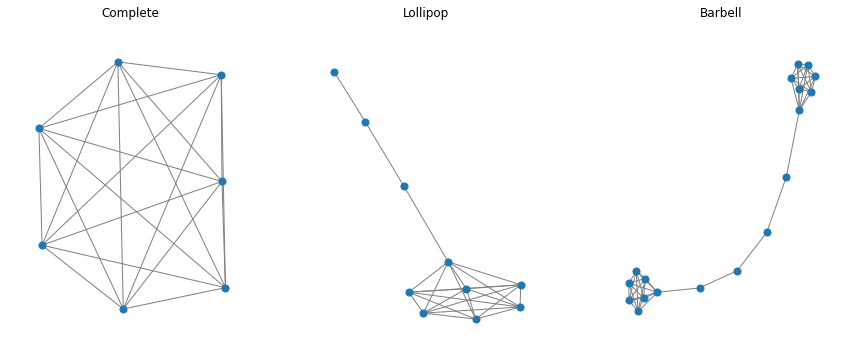

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete)
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop)
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell)
plt.savefig(os.path.join(output_dir, "SimpleGraphs.png"))

## We compose simple graphs into one

In [ ]:
complete = nx.relabel_nodes(nx.complete_graph(n=7), lambda x: x + 0)
lollipop = nx.relabel_nodes(nx.lollipop_graph(m=7, n=3), lambda x: x+100)
barbell = nx.relabel_nodes(nx.barbell_graph(m1=7, m2=4), lambda x: x+200)

In [ ]:
allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))

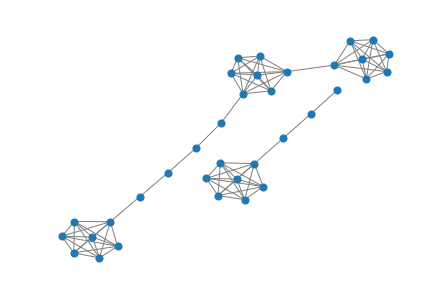

In [ ]:
draw_graph(allGraphs, layout=nx.kamada_kawai_layout)

## Model Barabasi Albert

In the following we create and analyse some simple graph generated by the Barabasi-Albert model 

In [ ]:
BA_graph_small = nx.extended_barabasi_albert_graph(n=20,m=1,p=0,q=0)

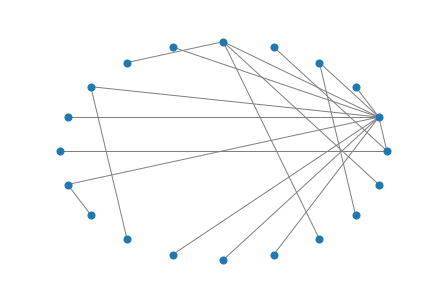

In [ ]:
draw_graph(BA_graph_small, layout=nx.circular_layout)

We analyse large Barabasi-Albert graphs to investigate their ability to generate power-law distribution for the degree of node

In [ ]:
n = 1E5
bag = nx.extended_barabasi_albert_graph(n,m=1,p=0,q=0)

degree = dict(nx.degree(bag)).values()
bins = np.round(np.logspace(np.log10(min(degree)), np.log10(max(degree)), 10))
cnt = Counter(np.digitize(np.array(list(degree)), bins))

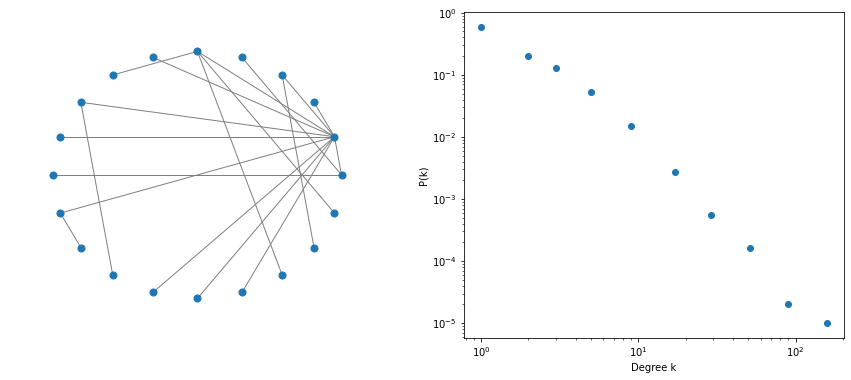

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
draw_graph(BA_graph_small, layout=nx.circular_layout)
plt.subplot(1,2,2)
x, y = list(zip(*[(bins[k-1], v/n) for k, v in cnt.items()]))
plt.plot(x, y, 'o'); plt.xscale("log"); plt.yscale("log")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.savefig(os.path.join(output_dir, "Barabasi_Albert.png"))

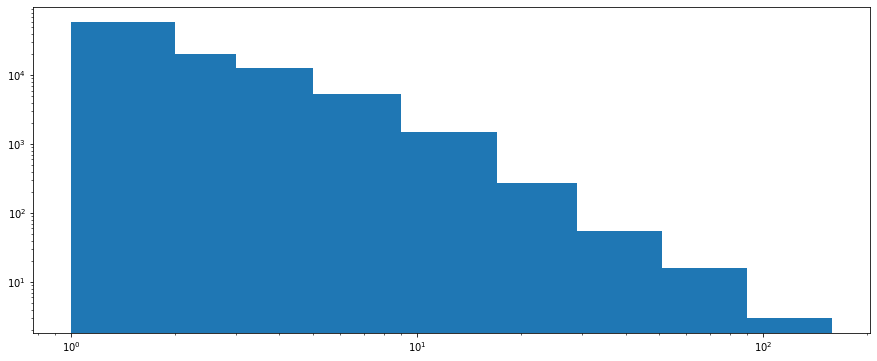

In [ ]:
plt.figure(figsize=(15, 6))

plt.hist(degree, bins=bins)
plt.xscale("log")
plt.yscale("log")

Other simple graph Benchmarks

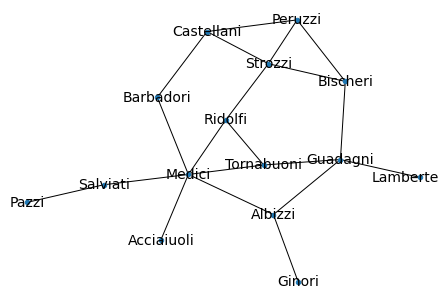

In [ ]:
graph = nx.florentine_families_graph()

nx.draw_kamada_kawai(graph, with_labels=True, node_size=20, font_size=14)
plt.savefig("Florentine.png")

## Benchmarks from the Network Data Repository

This dataset (and other) can be downloaded from http://networkrepository.com/. The datasets are generally in the MTX file format. In particular the dataset here presented is taken from the collaboration network of Arxiv Astro Physics, that can be downloaded from http://networkrepository.com/ca-AstroPh.php.
Some of the files that can be downloaded from that source are somewhat non-standard and needs small fixes.

> Note: Please make sure the header of the file has the following: 
`%%MatrixMarket matrix coordinate pattern symmetric`, with a double %.

In [ ]:
!wget https://nrvis.com/download/data/ca/ca-AstroPh.zip
!unzip ca-AstroPh.zip

In [ ]:
!head ca-AstroPh.mtx

%MatrixMarket matrix coordinate pattern symmetric 
17903 17903 196972
43 1
1952 1
2526 1
3027 1
3303 1
4484 1
5185 1
5233 1


In [ ]:
!tail -n +2 ca-AstroPh.mtx > ca-AstroPh-mod.mtx
!sed -i -e '1i%%MatrixMarket matrix coordinate pattern symmetric\' ca-AstroPh-mod.mtx

In [ ]:
!head ca-AstroPh-mod.mtx

%%MatrixMarket matrix coordinate pattern symmetric
17903 17903 196972
43 1
1952 1
2526 1
3027 1
3303 1
4484 1
5185 1
5233 1


In [ ]:
file = "ca-AstroPh-mod.mtx"
adj_matrix = mmread(file)

In [ ]:
graph = nx.from_scipy_sparse_matrix(adj_matrix)
degrees = dict(nx.degree(graph))
ci = nx.clustering(graph)
centrality = nx.centrality.eigenvector_centrality(graph)

In [ ]:
stats = pd.DataFrame({
    "centrality": centrality, 
    "C_i": ci, 
    "degree": degrees
})

In [ ]:
stats.head()

,centrality,C_i,degree
0,8.901198e-05,0.692137,43
1,3.208282e-10,1.000000,2
2,3.407931e-04,0.242424,12
3,4.290384e-06,0.000000,1
4,6.722036e-07,1.000000,2


Here we provide some simple analysis of the DataFrame we generated to see correlations between centrality, clustering coefficient and degree. 

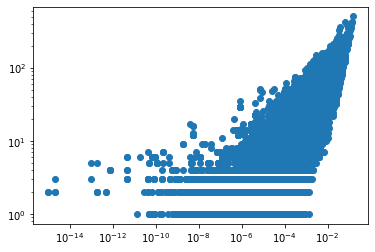

In [ ]:
plt.plot(stats["centrality"], stats["degree"], 'o')
plt.xscale("log")
plt.yscale("log")

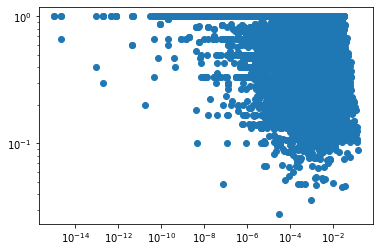

In [ ]:
plt.plot(stats["centrality"], stats["C_i"], 'o')
plt.xscale("log")
plt.yscale("log")

## Ego-network 

Here we plot the ego-network of the most-connected node, that has id 6933. However, even this network looks a bit messy since it has hundreds of nodes. We therefore sample randomly or based on centrality/clustering coefficient in order to plot a relevant subgraph.

In [ ]:
neighbors = [n for n in nx.neighbors(graph, 6933)]

In [ ]:
sampling = 0.1

In [ ]:
nTop = round(len(neighbors)*sampling)

In [ ]:
idx = {
    "random": stats.loc[neighbors].sort_index().index[:nTop], 
    "centrality": stats.loc[neighbors].sort_values("centrality", ascending=False).index[:nTop],
    "C_i": stats.loc[neighbors].sort_values("C_i", ascending=False).index[:nTop]
}

In [ ]:
def plotSubgraph(graph, indices, center = 6933):
    draw_graph(
        nx.subgraph(graph, list(indices) + [center]),
        layout = nx.kamada_kawai_layout
    )

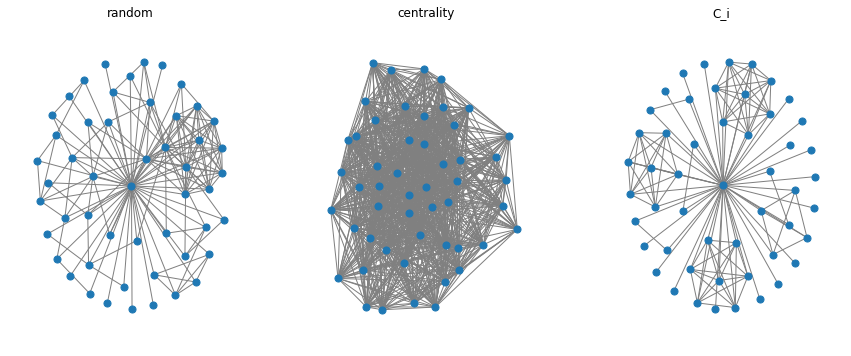

In [ ]:
plt.figure(figsize=(15,6))
for ith, title in enumerate(["random", "centrality", "C_i"]):
    plt.subplot(1,3,ith+1)
    plotSubgraph(graph, idx[title])
    plt.title(title)
plt.savefig(os.path.join(output_dir, "PhAstro"))

## Data to Gephi

Otherwise, we could also export the data from networkx in order to plot it and analyse it using the Gephi software.

In [ ]:
nx.write_gexf(graph, 'ca-AstroPh.gexf')